In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

scaler = StandardScaler()
model = KMeans()

In [2]:
movies = pd.read_csv('./ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
genres = movies.genres.str.get_dummies()
genres

all_movies = pd.concat([movies, genres], axis=1)
all_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783],
       ...,
       [-0.28150763, -0.37402098, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763,  2.67364678, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783]])

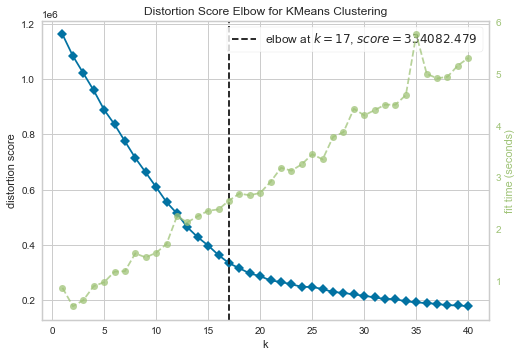

In [5]:
visualizer = KElbowVisualizer(model, k=(1, 41))
visualizer.fit(scaled_genres)
visualizer.show()

# #elbow at 17

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D0E758820>,
      dtype=object)

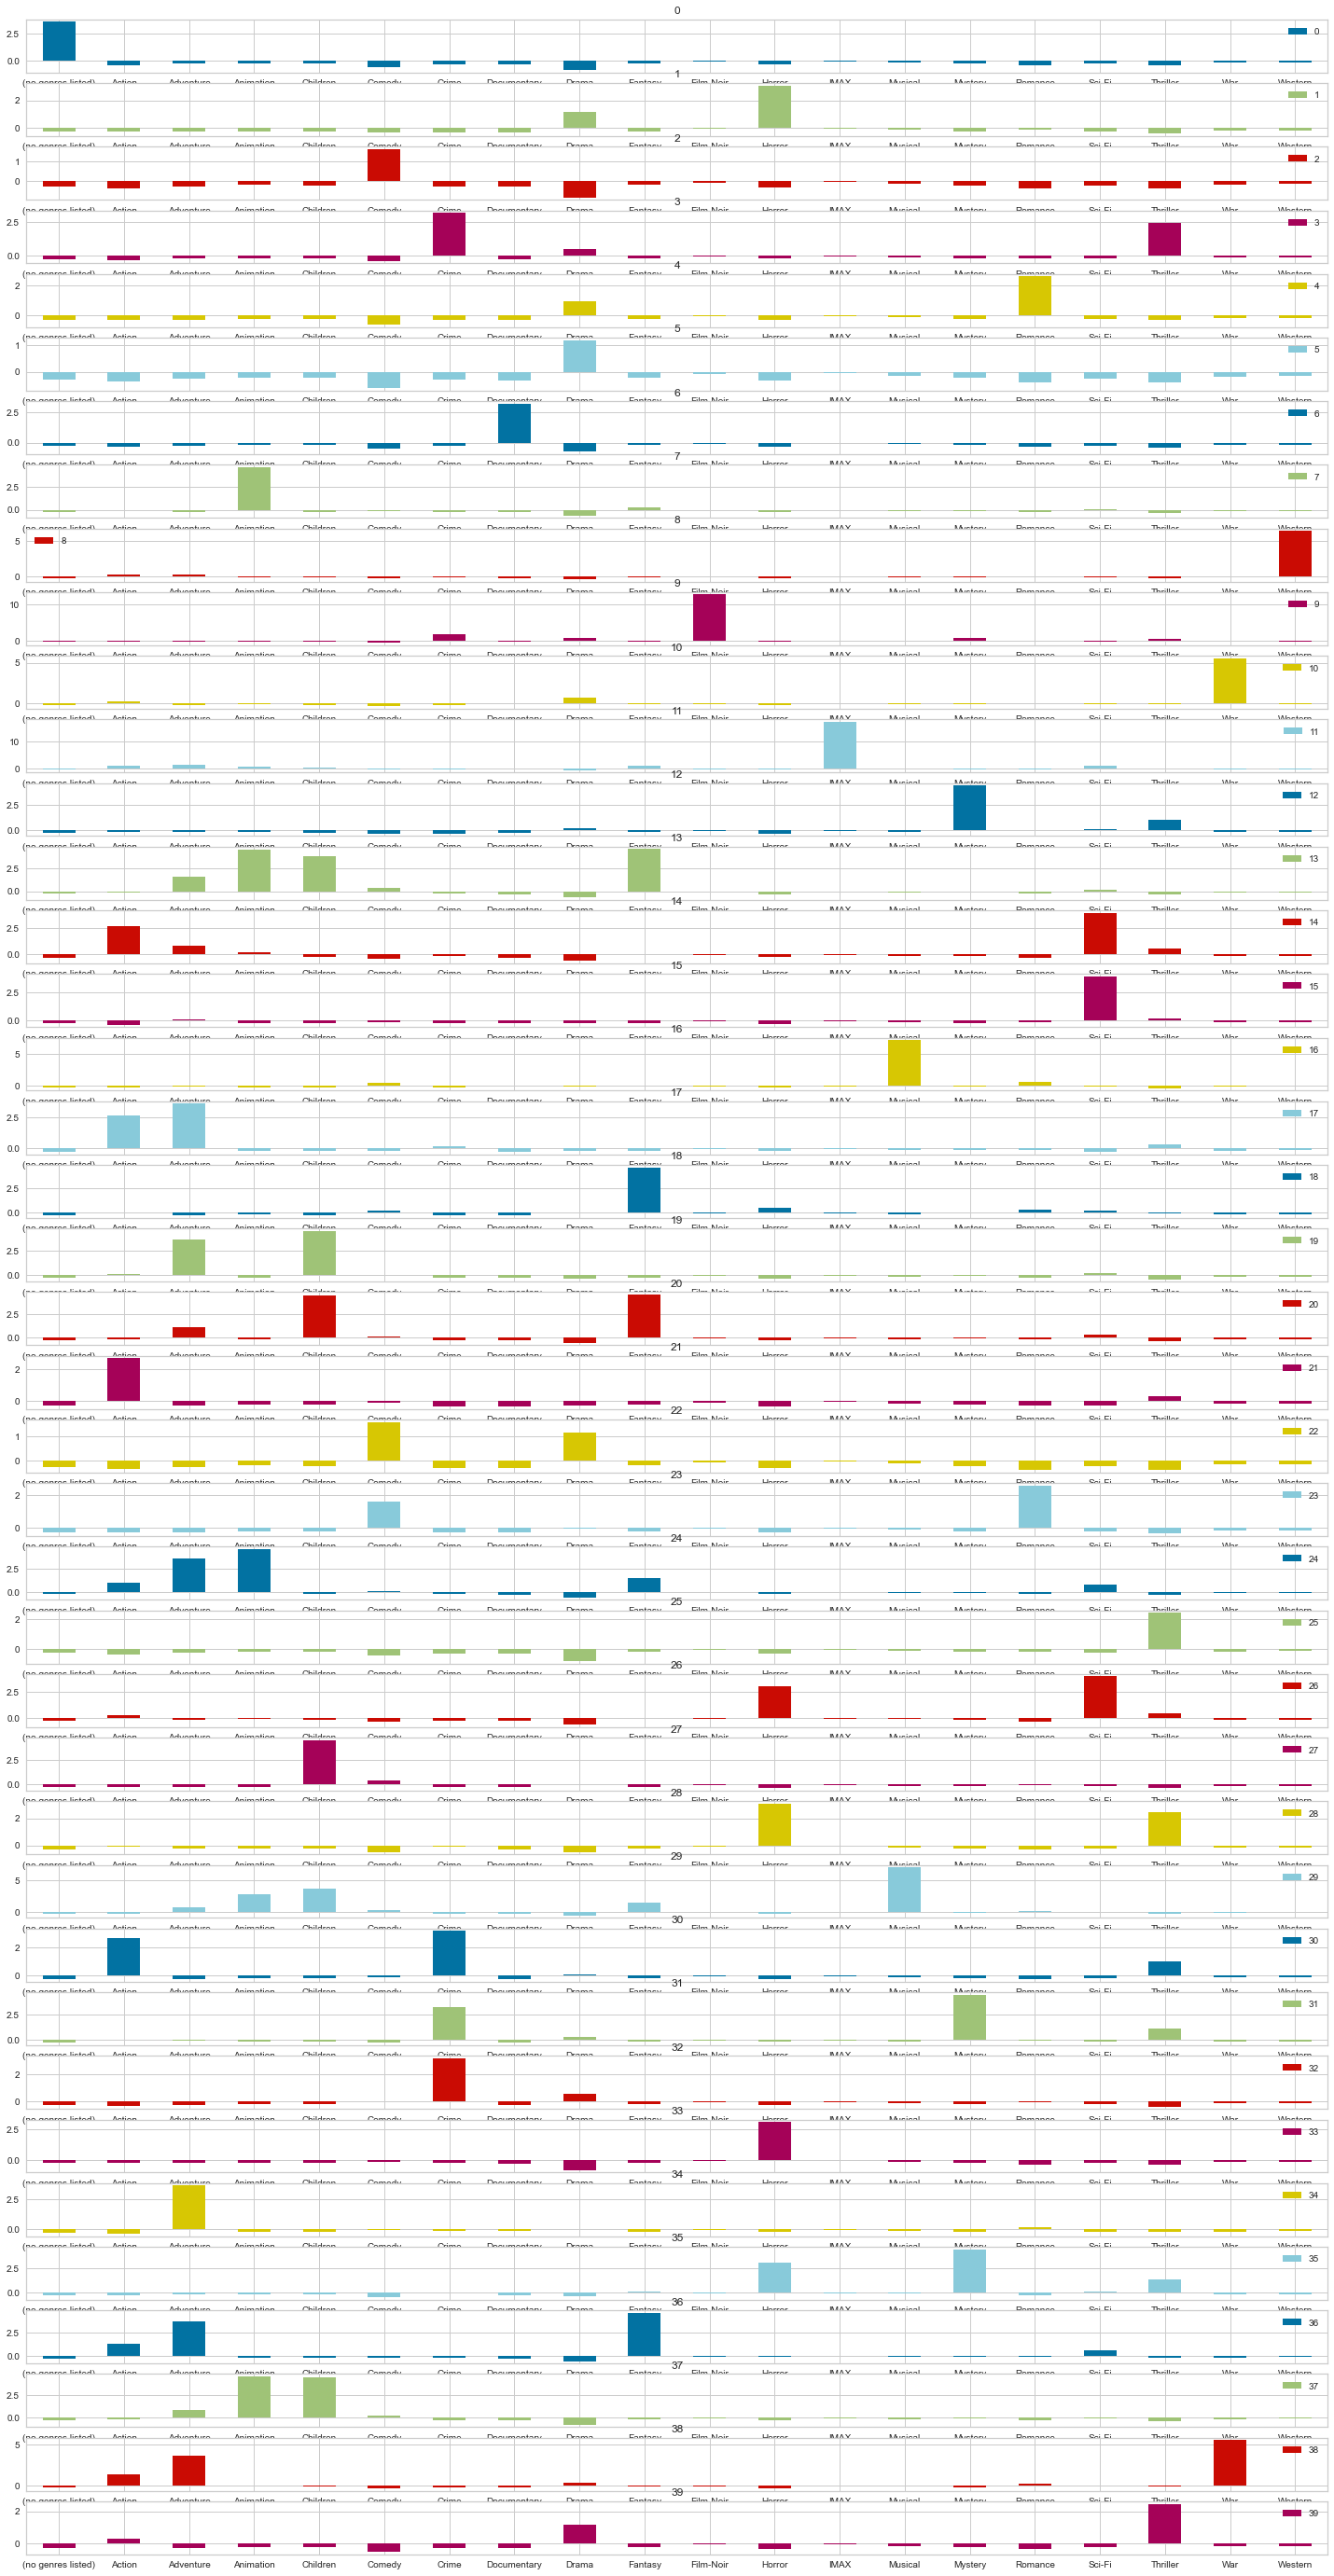

In [6]:
groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
groups.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [27]:
groups = model.labels_

movies_groups = pd.DataFrame(data=groups, columns={"groups"})

In [26]:
final_movies = pd.concat([movies, movies_groups], axis = 1)
final_movies

,movieId,title,genres,groups
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13
1,2,Jumanji (1995),Adventure|Children|Fantasy,20
2,3,Grumpier Old Men (1995),Comedy|Romance,23
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,23
4,5,Father of the Bride Part II (1995),Comedy,2
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),0
58094,193878,Les tribulations d'une caissière (2011),Comedy,2
58095,193880,Her Name Was Mumu (2016),Drama,5
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,26


In [72]:
selected_group = 0

def select_movie(title):
    selected_movie = final_movies.query('title == "{test}"'.format(test=title))
    selected_group = int(selected_movie.groups)
    print(selected_group)
    
select_movie("Toy Story (1995)")

13


In [74]:
def suggestions():
    test = final_movies.query("groups == '{group}'".format(group=selected_groups))
    print(test)
    
suggestions()

NameError: name 'selected_groups' is not defined

In [81]:
class sugest:
    def select_movie(self, title):
        selected_movie = final_movies.query('title == "{test}"'.format(test=title))
        self.selected_group = int(selected_movie.groups)
        print(selected_group)
    
    def suggestions(self):
        test = final_movies.query("groups == '{group}'".format(group=self.selected_group))
        print(test)    

In [82]:
s = sugest()
s.select_movie("Toy Story (1995)")
s.suggestions()

0
       movieId                                      title  \
0            1                           Toy Story (1995)   
553        558                     Pagemaster, The (1994)   
664        673                           Space Jam (1996)   
1128      1151                        Lesson Faust (1994)   
1837      1920                      Small Soldiers (1998)   
...        ...                                        ...   
57734   192981                     Penguin Highway (2018)   
57870   193357                              Gnomes (1981)   
57958   193569                  Enchanted Princess (2018)   
57963   193581  Black Butler: Book of the Atlantic (2017)   
57964   193583               No Game No Life: Zero (2017)   

                                                  genres  groups  
0            Adventure|Animation|Children|Comedy|Fantasy      13  
553          Action|Adventure|Animation|Children|Fantasy      13  
664    Adventure|Animation|Children|Comedy|Fantasy|Sc...      13